# FOUR WALL AND ROOF

# PART 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('house_data.csv')
df=df1.copy()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


TASK 1

In [3]:
df[['SalePrice','LotArea','GrLivArea','GarageArea','GarageCars','FullBath','YearBuilt','YrSold']]

,SalePrice,LotArea,GrLivArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold
0,208500,8450,1710,548,2,2,2003,2008
1,181500,9600,1262,460,2,2,1976,2007
2,223500,11250,1786,608,2,2,2001,2008
3,140000,9550,1717,642,3,1,1915,2006
4,250000,14260,2198,836,3,2,2000,2008
...,...,...,...,...,...,...,...,...
1455,175000,7917,1647,460,2,2,1999,2007
1456,210000,13175,2073,500,2,2,1978,2010
1457,266500,9042,2340,252,1,2,1941,2010
1458,142125,9717,1078,240,1,1,1950,2010


In [4]:
df[['SalePrice','LotArea','GrLivArea','GarageArea','GarageCars','FullBath','YearBuilt','YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SalePrice   1460 non-null   int64
 1   LotArea     1460 non-null   int64
 2   GrLivArea   1460 non-null   int64
 3   GarageArea  1460 non-null   int64
 4   GarageCars  1460 non-null   int64
 5   FullBath    1460 non-null   int64
 6   YearBuilt   1460 non-null   int64
 7   YrSold      1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


TASK 2

In [5]:
df=pd.concat([df,(df.YrSold-df.YearBuilt).rename('AgeWhenSold')],axis=1)

In [6]:
df.shape

(1460, 82)

TASK 3

In [7]:
df[df['LotArea']>40000].index

Int64Index([53, 249, 313, 335, 384, 451, 457, 523, 661, 706, 769, 848, 1298,
            1396],
           dtype='int64')

In [8]:
df.drop(df[df['LotArea']>40000].index,axis=0,inplace=True)

In [9]:
df.drop(df[df['GrLivArea']>2600].index,axis=0,inplace=True)

In [10]:
df.shape

(1396, 82)

# PART 2

## TASK 1

In [11]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
X_train=df_train['GrLivArea']
X_test=df_test['GrLivArea']
Y_train=df_train['SalePrice']
Y_test=df_test['SalePrice']

## TASK 2

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(pd.DataFrame(np.array(X_train).reshape(-1,1)),pd.DataFrame(np.array(Y_train)))
predict=reg.predict(pd.DataFrame(np.array(X_test).reshape(-1,1)))
predict

array([[192544.32580426],
       [245694.13479246],
       [262773.98884364],
       [147260.23907646],
       [191645.38611735],
       [111976.85636547],
       [153215.7145022 ],
       [149058.11845027],
       [171306.87570115],
       [213781.77590737],
       [203556.33696883],
       [172318.18284891],
       [157260.94309327],
       [210186.01715975],
       [131641.1620165 ],
       [300978.92553707],
       [165239.03281454],
       [184116.76623953],
       [159395.92484967],
       [113774.73573928],
       [221422.76324605],
       [173891.327301  ],
       [219961.98625483],
       [116696.28972172],
       [202432.6623602 ],
       [207264.46317731],
       [169396.62886647],
       [255020.63404409],
       [246368.33955764],
       [242772.58081002],
       [248840.42369663],
       [170183.20109252],
       [132202.99932082],
       [161980.37644952],
       [231535.83472372],
       [119168.37386071],
       [175127.36937049],
       [242997.31573175],
       [ 978

## TASK 3

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


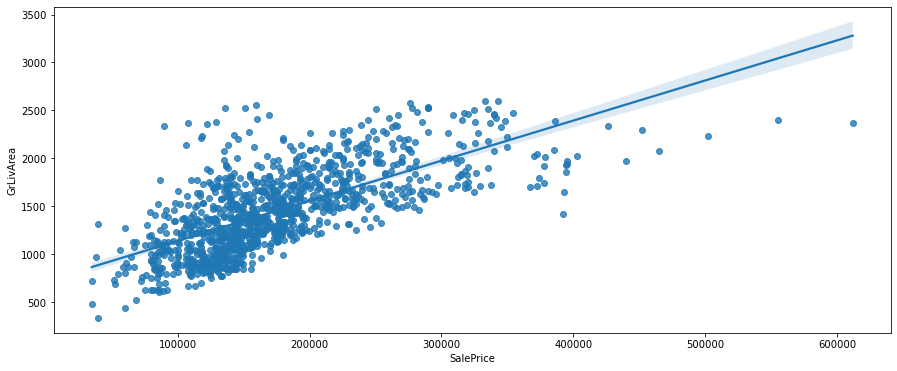

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(15,6))
sns.regplot(Y_train,X_train)
plt.show()

In [14]:
df[['GrLivArea','SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.677466
SalePrice,0.677466,1.000000


C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


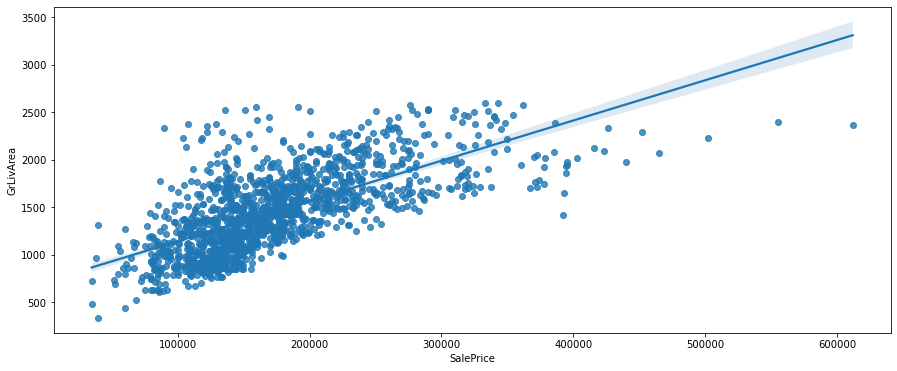

In [15]:
fig,ax=plt.subplots(figsize=(15,6))
sns.regplot(df['SalePrice'],df['GrLivArea'])
plt.show()

## TASK 4

In [16]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_train,Y_train))

186705.32082298512

In [17]:
np.sqrt(mean_squared_error(predict,Y_test))

45200.37986992076

## TASK 5

In [18]:
for x in list(np.random.randint(1,100,10)):
    df_train,df_test=train_test_split(df,test_size=0.2,random_state=x)
    X_train=df_train['GrLivArea']
    X_test=df_test['GrLivArea']
    Y_train=df_train['SalePrice']
    Y_test=df_test['SalePrice']
    print(f'RMSE for {x}:',np.sqrt(mean_squared_error(X_train,Y_train)))

RMSE for 34: 185819.3554777796
RMSE for 86: 186227.44956811835
RMSE for 62: 184601.1647806599
RMSE for 2: 181532.41240750713
RMSE for 34: 185819.3554777796
RMSE for 90: 184011.55372362427
RMSE for 51: 183654.01170655948
RMSE for 83: 184132.10902747491
RMSE for 84: 187110.8079017752
RMSE for 30: 185312.09169003475


The values are under fit.

# PART 3

## TASK 1

In [19]:
df3=df1[['SalePrice','LotArea','GrLivArea','GarageArea']]
df3['AgeWhenSold']=df1['YrSold']-df1['YearBuilt']
df3

C:\Users\krish\AppData\Local\Temp/ipykernel_10228/40551488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['AgeWhenSold']=df1['YrSold']-df1['YearBuilt']


,SalePrice,LotArea,GrLivArea,GarageArea,AgeWhenSold
0,208500,8450,1710,548,5
1,181500,9600,1262,460,31
2,223500,11250,1786,608,7
3,140000,9550,1717,642,91
4,250000,14260,2198,836,8
...,...,...,...,...,...
1455,175000,7917,1647,460,8
1456,210000,13175,2073,500,32
1457,266500,9042,2340,252,69
1458,142125,9717,1078,240,60


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SalePrice    1460 non-null   int64
 1   LotArea      1460 non-null   int64
 2   GrLivArea    1460 non-null   int64
 3   GarageArea   1460 non-null   int64
 4   AgeWhenSold  1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [21]:
df3['AgeWhenSold'].astype('int')

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: AgeWhenSold, Length: 1460, dtype: int32

In [22]:
df3_train,df3_test=train_test_split(df3,test_size=0.2,random_state=1)
X3_train=df3_train.drop(columns='SalePrice',axis=1)
X3_test=df3_test.drop(columns='SalePrice',axis=1)
Y3_train=df3_train['SalePrice']
Y3_test=df3_test['SalePrice']
reg3=LinearRegression().fit(X3_train,Y3_train)
predict3=reg3.predict(X3_test)
predict3

array([234932.23866788, 184505.03921962, 114091.53936811,  70879.85990144,
       150749.15760585, 284961.20030127, 287813.98621323, 182563.50942995,
       240186.39795187, 213827.29838619, 181698.66552062,  55611.57079326,
       222988.89894657, 276982.89649103, 251140.82165747, 101942.4726692 ,
       121746.14679194, 152525.95711722, 204776.52800015, 123994.0572981 ,
       110926.8348881 , 173298.99827216, 213793.75972578, 250610.49134779,
        79890.50194571, 197685.5864081 , 126528.80386689, 197149.17881425,
       361557.68264079, 161786.89998762, 155193.08361677, 138173.46836986,
       121135.27614502,  96037.37343107, 150339.28919969, 261096.23799693,
       100061.26196189,  53411.79159597, 261348.90290627, 112356.03886599,
       161949.72361494, 129463.31400917,  90891.21389631, 124825.33701756,
       216135.04206742, 193440.88091665,  95276.30322368, 180073.87334655,
       240669.18545224, 241229.86920126, 109593.22173294, 290238.9003447 ,
       134093.52423167, 2

In [23]:
np.sqrt(mean_squared_error(predict3,Y3_test))

42310.601904941184

there is a improvement in the performance

## TASK 3

In [24]:
df3.columns

Index(['SalePrice', 'LotArea', 'GrLivArea', 'GarageArea', 'AgeWhenSold'], dtype='object')

In [25]:
sample_pred=reg3.predict([[2000,400,80,40]])
sample_pred

array([57766.29284932])

In [26]:
df31=df3[((df3.GrLivArea>360)&(df3.GrLivArea<440))|((df3.LotArea>1800)&(df3.LotArea<2200))|((df3.GarageArea<72)&(df3.GarageArea>88))|((df3.AgeWhenSold<36)&(df3.AgeWhenSold>44))]
df31


,SalePrice,LotArea,GrLivArea,GarageArea,AgeWhenSold
180,177000,2117,1525,440,7
227,106000,1869,987,280,38
432,122500,1920,1365,440,36
434,81000,1890,630,0,36
500,113000,1890,1218,264,34
599,151000,1950,1556,452,28
623,168500,2117,1512,440,7
649,84500,1936,630,0,37
915,75000,2001,1092,286,37
1086,83500,1974,1092,286,37


there is a improvement in the performance


# PART 4

## TASK 1

In [27]:
from sklearn.linear_model import LogisticRegression
df4=df1
FullBath_dummies = pd.get_dummies(df4.FullBath, prefix="FullBath")
df4_with_dummies = pd.concat([df4,FullBath_dummies],axis='columns')
df4_with_dummies.drop('FullBath',axis='columns',inplace=True)
df4_with_dummies['FullBath_1'].value_counts()


0    810
1    650
Name: FullBath_1, dtype: int64

In [28]:
X4_train,X4_test,Y4_train,Y4_test=train_test_split(df4_with_dummies['GrLivArea'],df4_with_dummies['FullBath_1'],test_size=0.2,random_state=1)

logreg = LogisticRegression()
logreg.fit(pd.DataFrame(np.array(X4_train).reshape(-1,1)),pd.DataFrame(np.array(Y4_train)))
Y4_pred = logreg.predict(pd.DataFrame(np.array(X4_test)))
Y4_pred

C:\Users\krish\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0], dtype=uint8)

In [29]:
Y4_test

258     0
267     0
288     1
649     1
1233    1
       ..
163     1
47      0
1432    0
98      1
409     0
Name: FullBath_1, Length: 292, dtype: uint8

In [30]:
lr_probs = logreg.predict_proba(pd.DataFrame(np.array(X4_test)))
ns_probs = [0 for _ in range(len(Y4_test))]

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


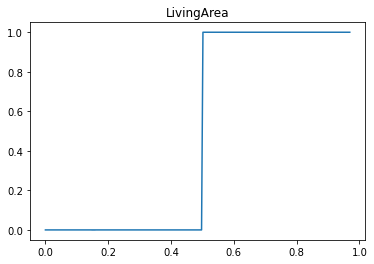

In [31]:
sns.lineplot(lr_probs[:,1],Y4_pred)
plt.title('LivingArea')
plt.show()

In [32]:
X4a_train,X4a_test,Y4a_train,Y4a_test=train_test_split(df4_with_dummies['GarageArea'],df4_with_dummies['FullBath_1'],test_size=0.2,random_state=1)

logrega = LogisticRegression()
logrega.fit(pd.DataFrame(np.array(X4a_train).reshape(-1,1)),pd.DataFrame(np.array(Y4a_train)))
Y4a_pred = logrega.predict(pd.DataFrame(np.array(X4a_test)))
lra_probs = logrega.predict_proba(pd.DataFrame(np.array(X4a_test)))
nsa_probs = [0 for _ in range(len(Y4a_test))]

C:\Users\krish\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


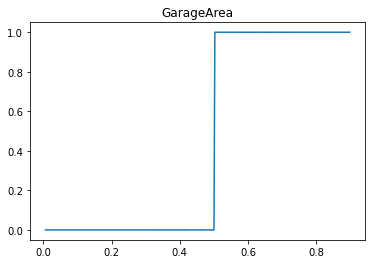

In [33]:
sns.lineplot(lra_probs[:,1],Y4a_pred)
plt.title('GarageArea')
plt.show()

## TASK 2

In [34]:
probability=logreg.predict_proba(pd.DataFrame(np.array(X4_test)))
df1.loc[np.where(probability[:,0]>0.9)]['GrLivArea']

1      1262
5      1362
6      1694
8      1774
21     1108
28     1600
30     1317
35     2452
38     1057
49      955
51     1176
53     1842
61     1111
70     2223
72     1718
78     1768
80     2142
100    1610
109    1844
111    1430
118    3222
122    1080
124    1586
128    1348
130    2157
136    1214
138    1852
141    1734
155    1096
170    1382
172    1767
176    2060
186    1217
187    1656
195    1456
201    1279
207    1100
208    2062
215    1236
220    1498
223     864
236    1414
239    1487
245    1872
261    2574
278    2121
284    1575
291    1716
Name: GrLivArea, dtype: int64

## TASK 3

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y4_test,Y4_pred)

array([[129,  29],
       [ 28, 106]], dtype=int64)

In [36]:
confusion_matrix(Y4a_test,Y4a_pred)

array([[121,  37],
       [ 55,  79]], dtype=int64)

In [37]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

roc_garage_area=roc_auc_score(Y4a_test, lra_probs[:,1])
roc_garage_area

0.7308709616474589

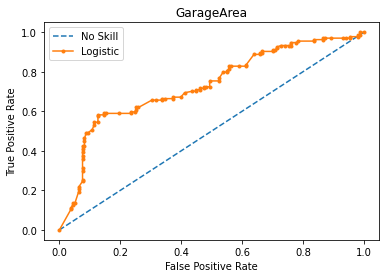

In [38]:

nsa_fpr, nsa_tpr, _ = roc_curve(Y4a_test, nsa_probs)
lra_fpr, lra_tpr, _ = roc_curve(Y4a_test, lra_probs[:,1])

pyplot.plot(nsa_fpr, nsa_tpr, linestyle='--', label='No Skill')
pyplot.plot(lra_fpr, lra_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('GarageArea')
pyplot.legend()

pyplot.show()

In [39]:
roc_living_area=roc_auc_score(Y4_test, lr_probs[:,1])
roc_living_area

0.8736774985830341

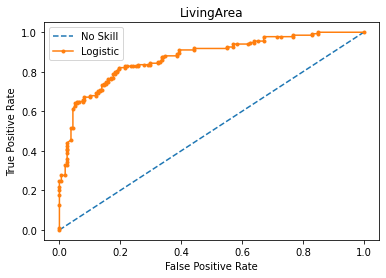

In [40]:


ns_fpr, ns_tpr, _ = roc_curve(Y4_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y4_test, lr_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('LivingArea')
pyplot.legend()

pyplot.show()

Living Area is better the garage Area as the roc is greater.

# PART 5

## TASK 1

In [41]:
df5=df1[df1['GarageCars']>0]
df5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [42]:
df5.dropna(axis=1,inplace=True)

C:\Users\krish\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [43]:
df5

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## TASK 2

In [44]:
from sklearn.model_selection import train_test_split
X5_train,X5_test,Y5_train,Y5_test=train_test_split(df5[['LotArea','YearBuilt']],df5['GarageCars'],test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3).fit(X5_train,Y5_train)
y5_pred=clf.predict(X5_test)
print(y5_pred)
clf.score(X5_test,Y5_test)

[2 1 1 2 2 1 2 2 1 1 1 1 2 3 2 1 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 1 1 1 2 3 1
 1 2 2 2 2 1 2 2 2 1 2 1 2 1 1 1 1 2 1 2 2 1 2 1 1 2 2 1 2 2 1 2 3 1 2 1 1
 1 2 1 1 2 1 3 2 2 2 2 2 1 1 2 3 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2
 1 2 2 2 1 2 3 2 2 2 1 1 1 2 2 1 3 2 1 2 1 1 2 2 1 2 1 1 1 1 2 2 2 2 2 1 2
 1 3 1 2 1 3 3 1 2 1 1 1 2 2 2 2 1 1 2 2 1 1 1 1 1 2 1 2 2 2 1 2 2 2 3 2 2
 2 1 2 2 1 2 2 2 1 1 2 1 3 3 3 2 3 3 2 2 1 1 2 2 2 2 1 1 3 2 3 2 2 1 3 1 1
 2 2 3 3 1 2 1 1 2 2 2 2 1 1 2 2 1 2 2 1 2 2 2 3 2 1 2 1 1 2 2 2 1 1 3 1 2
 1 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 1]


0.6920289855072463

## Task 3

In [45]:
accuracy=[]
for x in [2,4,5,6]:
    clf=DecisionTreeClassifier(max_depth=x).fit(X5_train,Y5_train)
    y5_pred=clf.predict(X5_test)
    accuracy.append(clf.score(X5_test,Y5_test))
    print(clf.score(X5_test,Y5_test))

0.6847826086956522
0.6847826086956522
0.6920289855072463
0.6811594202898551


In [50]:
import matplotlib.pyplot as plt
from ipywidgets import interactive
from sklearn.preprocessing import StandardScaler,MinMaxScaler

def scatter_plot(k):
    X = df5[['LotArea','YearBuilt']]
    y = np.array(df5['GarageCars'])
    Stand_scaler = StandardScaler()
    X_ = Stand_scaler.fit_transform(X)
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(X_, y)

    h = 0.05
    x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
    y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(x=X_[:, 0], y=X_[:, 1], c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Max_depth (k = %i)"% (k))
    plt.xlabel('GarageCars')
    plt.ylabel('LotArea YearBuilt')

    plt.show()

In [51]:
interactive_plot = interactive(scatter_plot, k=(2, 7, 1))
output = interactive_plot.children[-1]

interactive_plot

interactive(children=(IntSlider(value=4, description='k', max=7, min=2), Output()), _dom_classes=('widget-inte…